In [3]:
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

In [5]:

#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print (X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [7]:
def calculate_penalty(W):
    penalty = 0
    for i in np.arange(0, W.shape[0]):
        for j in np.arange(0, W.shape[1]):
            penalty += (W[i][j] ** 2)
    #penalty = np.sqrt(penalty)
    return penalty

def softmax(X, W, c):
    var1 = np.dot(X, W.T).reshape(-1, len(c))
    exp = np.exp(var1-np.max(var1, axis=1).reshape((-1,1)))
    norms = np.sum(exp, axis=1).reshape((-1,1))
    softmax = exp / norms
    return softmax


def calculate_loss_function(soft_max, Y, l, penalty):
    return (-1* ((np.sum(Y * np.log(soft_max+1e-6))/Y.shape[0]))) + (l*penalty)
    #return -1 * ((np.mean(Y * np.log(soft_max+1e-6)))+ (l*penalty))

# 3.2 batch gradient descent (GD) for Logistic regression

def LogisticRegression_GD(X_train, y_train, learning_rate):
    c = np.unique(y_train)
    cl = {i:v for v,i in enumerate(c)}
    X = np.insert(X_train, 0, 1, axis=1)
    W = np.zeros(shape=(len(c), X.shape[1]))
    Y = np.eye(len(c))[np.vectorize(lambda c: cl[c])(y_train).reshape(-1)]
    l = 0.1/2
    loss = []
    soft_max = softmax(X, W, c)
    penalty = calculate_penalty(W)
    #penalty = LA.norm(W, 'fro')
    prev_F = calculate_loss_function(soft_max, Y, l, penalty)
    loss.append(prev_F)
    iteration =0
    while True:
        e = Y - soft_max
        #de = np.mean(e, axis=0)
        #u = (learning_rate/Y.shape[0]*np.dot(e.T, X))- (learning_rate *l *W)
        u= ((learning_rate/Y.shape[0]) * np.dot(e.T, X)) - (learning_rate*0.1*W)
        W += u
        soft_max = softmax(X, W, c)
        penalty = calculate_penalty(W)
        #penalty = LA.norm(W, 'fro')
        new_F = calculate_loss_function(soft_max, Y, l, penalty)
        loss.append(new_F)
        difference_loss = abs(new_F - prev_F)
        if difference_loss < 1.0e-4:
            break
        prev_F = new_F
        iteration = iteration+1
        print(f'iteration: {str(iteration)}')
        print(f'new F: {str(new_F)}')
        print(f'prev F: {str(prev_F)}')
        print(f'difference: {str(difference_loss)}')
    b= W[:, 0]
    return W, b, loss

In [8]:
def Calculate_Accuracy_1(X, y):
    X = np.insert(X, 0, 1, axis=1)
    cs = np.unique(y_train)
    W1, b1, loss1 = LogisticRegression_GD(X_train, y_train, 5.0e-3)
    Z = np.dot(X, W1.T).reshape(-1,len(cs))
    var1 = np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1)))/ np.sum(np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1))), axis=1).reshape(-1,1)
    var2 = np.vectorize(lambda c: cs[c])(np.argmax(var1, axis=1))
    return np.mean(var2 == y)

def Calculate_Accuracy_2(X, y):
    X = np.insert(X, 0, 1, axis=1)
    cs = np.unique(y_train)
    W2, b2, loss2= LogisticRegression_GD(X_train, y_train, 1.0e-2)
    Z = np.dot(X, W2.T).reshape(-1,len(cs))
    var1 = np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1)))/ np.sum(np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1))), axis=1).reshape(-1,1)
    var2 = np.vectorize(lambda c: cs[c])(np.argmax(var1, axis=1))
    return np.mean(var2 == y)

def Calculate_Accuracy_3(X, y):
    X = np.insert(X, 0, 1, axis=1)
    cs = np.unique(y_train)
    W3, b3, loss3 = LogisticRegression_GD(X_train, y_train, 5.0e-2)
    Z = np.dot(X, W3.T).reshape(-1,len(cs))
    var1 = np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1)))/ np.sum(np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1))), axis=1).reshape(-1,1)
    var2 = np.vectorize(lambda c: cs[c])(np.argmax(var1, axis=1))
    return np.mean(var2 == y)

In [9]:
# %%
s11 = Calculate_Accuracy_1(X_train, y_train)
s12 = Calculate_Accuracy_1(X_test, y_test)
s22 = Calculate_Accuracy_2(X_train, y_train)
s23 = Calculate_Accuracy_2(X_test, y_test)
s33 = Calculate_Accuracy_3(X_train, y_train)
s34 = Calculate_Accuracy_3(X_test, y_test)

iteration: 1
new F: 2.057361631981816
prev F: 2.057361631981816
difference: 0.2452134610622294
iteration: 2
new F: 1.8459541003784492
prev F: 1.8459541003784492
difference: 0.21140753160336678
iteration: 3
new F: 1.664657968130296
prev F: 1.664657968130296
difference: 0.18129613224815322
iteration: 4
new F: 1.5100001506337561
prev F: 1.5100001506337561
difference: 0.15465781749653984
iteration: 5
new F: 1.3783934495735708
prev F: 1.3783934495735708
difference: 0.13160670106018535
iteration: 6
new F: 1.2663692209168216
prev F: 1.2663692209168216
difference: 0.11202422865674921
iteration: 7
new F: 1.170763947232785
prev F: 1.170763947232785
difference: 0.09560527368403648
iteration: 8
new F: 1.0888202884144635
prev F: 1.0888202884144635
difference: 0.08194365881832155
iteration: 9
new F: 1.0182076140699845
prev F: 1.0182076140699845
difference: 0.07061267434447904
iteration: 10
new F: 0.9569944472274233
prev F: 0.9569944472274233
difference: 0.06121316684256117
iteration: 11
new F: 0.903

prev F: 0.28136753924808944
difference: 0.001288568785741795
iteration: 92
new F: 0.28010450276424753
prev F: 0.28010450276424753
difference: 0.0012630364838419061
iteration: 93
new F: 0.2788662369048929
prev F: 0.2788662369048929
difference: 0.0012382658593546592
iteration: 94
new F: 0.2776520105508986
prev F: 0.2776520105508986
difference: 0.0012142263539942633
iteration: 95
new F: 0.27646112159856245
prev F: 0.27646112159856245
difference: 0.0011908889523361554
iteration: 96
new F: 0.27529289551049746
prev F: 0.27529289551049746
difference: 0.0011682260880649942
iteration: 97
new F: 0.27414668395364056
prev F: 0.27414668395364056
difference: 0.001146211556856902
iteration: 98
new F: 0.2730218635182823
prev F: 0.2730218635182823
difference: 0.0011248204353582758
iteration: 99
new F: 0.27191783451250234
prev F: 0.27191783451250234
difference: 0.0011040290057799385
iteration: 100
new F: 0.270834019826838
prev F: 0.270834019826838
difference: 0.0010838146856643194
iteration: 101
new F: 

iteration: 176
new F: 0.22265679021262208
prev F: 0.22265679021262208
difference: 0.0003760712220421403
iteration: 177
new F: 0.22228476923761673
prev F: 0.22228476923761673
difference: 0.0003720209750053549
iteration: 178
new F: 0.22191673424882744
prev F: 0.22191673424882744
difference: 0.00036803498878928975
iteration: 179
new F: 0.22155262234436632
prev F: 0.22155262234436632
difference: 0.0003641119044611174
iteration: 180
new F: 0.22119237194533792
prev F: 0.22119237194533792
difference: 0.00036025039902840006
iteration: 181
new F: 0.2208359227610398
prev F: 0.2208359227610398
difference: 0.00035644918429811323
iteration: 182
new F: 0.2204832157552608
prev F: 0.2204832157552608
difference: 0.00035270700577899605
iteration: 183
new F: 0.2201341931136371
prev F: 0.2201341931136371
difference: 0.000349022641623703
iteration: 184
new F: 0.21978879821202776
prev F: 0.21978879821202776
difference: 0.0003453949016093416
iteration: 185
new F: 0.21944697558587148
prev F: 0.219446975585871

iteration: 276
new F: 0.19845696203196952
prev F: 0.19845696203196952
difference: 0.00015643659814465471
iteration: 277
new F: 0.1983016492476285
prev F: 0.1983016492476285
difference: 0.00015531278434102735
iteration: 278
new F: 0.19814744863727013
prev F: 0.19814744863727013
difference: 0.00015420061035836818
iteration: 279
new F: 0.19799434872095628
prev F: 0.19799434872095628
difference: 0.000153099916313848
iteration: 280
new F: 0.19784233817588967
prev F: 0.19784233817588967
difference: 0.00015201054506661094
iteration: 281
new F: 0.1976914058337284
prev F: 0.1976914058337284
difference: 0.00015093234216126405
iteration: 282
new F: 0.19754154067795665
prev F: 0.19754154067795665
difference: 0.00014986515577175563
iteration: 283
new F: 0.19739273184130743
prev F: 0.19739273184130743
difference: 0.0001488088366492224
iteration: 284
new F: 0.19724496860323903
prev F: 0.19724496860323903
difference: 0.00014776323806839353
iteration: 285
new F: 0.1970982403874621
prev F: 0.19709824038

iteration: 45
new F: 0.39141712677845564
prev F: 0.39141712677845564
difference: 0.004633412087327593
iteration: 46
new F: 0.3869651194674743
prev F: 0.3869651194674743
difference: 0.004452007310981332
iteration: 47
new F: 0.3826836919540677
prev F: 0.3826836919540677
difference: 0.004281427513406599
iteration: 48
new F: 0.37856287797036287
prev F: 0.37856287797036287
difference: 0.004120813983704841
iteration: 49
new F: 0.3745934862258154
prev F: 0.3745934862258154
difference: 0.003969391744547468
iteration: 50
new F: 0.3707670262466662
prev F: 0.3707670262466662
difference: 0.0038264599791492104
iteration: 51
new F: 0.36707564254348674
prev F: 0.36707564254348674
difference: 0.0036913837031794516
iteration: 52
new F: 0.3635120560422017
prev F: 0.3635120560422017
difference: 0.003563586501285021
iteration: 53
new F: 0.3600695118656793
prev F: 0.3600695118656793
difference: 0.0034425441765223996
iteration: 54
new F: 0.3567417326809426
prev F: 0.3567417326809426
difference: 0.0033277791

iteration: 154
new F: 0.23199642614868612
prev F: 0.23199642614868612
difference: 0.0004847298192199312
iteration: 155
new F: 0.23151759471972186
prev F: 0.23151759471972186
difference: 0.0004788314289642659
iteration: 156
new F: 0.23104455543999708
prev F: 0.23104455543999708
difference: 0.00047303927972477955
iteration: 157
new F: 0.2305772046218656
prev F: 0.2305772046218656
difference: 0.0004673508181314845
iteration: 158
new F: 0.2301154410542709
prev F: 0.2301154410542709
difference: 0.0004617635675946974
iteration: 159
new F: 0.2296591659287358
prev F: 0.2296591659287358
difference: 0.0004562751255350883
iteration: 160
new F: 0.22920828276800856
prev F: 0.22920828276800856
difference: 0.0004508831607272501
iteration: 161
new F: 0.22876269735725333
prev F: 0.22876269735725333
difference: 0.0004455854107552337
iteration: 162
new F: 0.22832231767767652
prev F: 0.22832231767767652
difference: 0.00044037967957680224
iteration: 163
new F: 0.2278870538424932
prev F: 0.2278870538424932


iteration: 246
new F: 0.20369772627743432
prev F: 0.20369772627743432
difference: 0.00019648698535826292
iteration: 247
new F: 0.20350280300038795
prev F: 0.20350280300038795
difference: 0.00019492327704637158
iteration: 248
new F: 0.20330942537280083
prev F: 0.20330942537280083
difference: 0.00019337762758711574
iteration: 249
new F: 0.2031175756128053
prev F: 0.2031175756128053
difference: 0.00019184975999553266
iteration: 250
new F: 0.20292723621021086
prev F: 0.20292723621021086
difference: 0.0001903394025944416
iteration: 251
new F: 0.20273838992131898
prev F: 0.20273838992131898
difference: 0.00018884628889187516
iteration: 252
new F: 0.2025510197638562
prev F: 0.2025510197638562
difference: 0.00018737015746278507
iteration: 253
new F: 0.20236510901202273
prev F: 0.20236510901202273
difference: 0.00018591075183346795
iteration: 254
new F: 0.20218064119165408
prev F: 0.20218064119165408
difference: 0.0001844678203686556
iteration: 255
new F: 0.20199760007549186
prev F: 0.201997600

difference: 0.3385392518870074
iteration: 3
new F: 1.2602986264207465
prev F: 1.2602986264207465
difference: 0.2353302367036625
iteration: 4
new F: 1.1079848163929542
prev F: 1.1079848163929542
difference: 0.15231381002779232
iteration: 5
new F: 1.0064668786184596
prev F: 1.0064668786184596
difference: 0.10151793777449458
iteration: 6
new F: 0.9923893011061541
prev F: 0.9923893011061541
difference: 0.014077577512305539
iteration: 7
new F: 0.836427010805382
prev F: 0.836427010805382
difference: 0.15596229030077213
iteration: 8
new F: 0.8306331637257686
prev F: 0.8306331637257686
difference: 0.00579384707961339
iteration: 9
new F: 0.7600160683626851
prev F: 0.7600160683626851
difference: 0.07061709536308347
iteration: 10
new F: 0.7784828767583507
prev F: 0.7784828767583507
difference: 0.018466808395665613
iteration: 11
new F: 0.6629285922973266
prev F: 0.6629285922973266
difference: 0.11555428446102411
iteration: 12
new F: 0.6627291800307246
prev F: 0.6627291800307246
difference: 0.00019

iteration: 102
new F: 0.2127069283141389
prev F: 0.2127069283141389
difference: 0.0005510195708181564
iteration: 103
new F: 0.21216607251489553
prev F: 0.21216607251489553
difference: 0.0005408557992433727
iteration: 104
new F: 0.21163510726676912
prev F: 0.21163510726676912
difference: 0.0005309652481264027
iteration: 105
new F: 0.21111376908059087
prev F: 0.21111376908059087
difference: 0.0005213381861782496
iteration: 106
new F: 0.2106018037670697
prev F: 0.2106018037670697
difference: 0.0005119653135211844
iteration: 107
new F: 0.2100989660282284
prev F: 0.2100989660282284
difference: 0.0005028377388412997
iteration: 108
new F: 0.20960501907028092
prev F: 0.20960501907028092
difference: 0.0004939469579474665
iteration: 109
new F: 0.209119734236647
prev F: 0.209119734236647
difference: 0.0004852848336339144
iteration: 110
new F: 0.2086428906598864
prev F: 0.2086428906598864
difference: 0.00047684357676061606
iteration: 111
new F: 0.20817427493142326
prev F: 0.20817427493142326
diffe

prev F: 0.1851245119155069
difference: 0.00014640122741835238
iteration: 200
new F: 0.18497962542988478
prev F: 0.18497962542988478
difference: 0.00014488648562213657
iteration: 201
new F: 0.18483623178098083
prev F: 0.18483623178098083
difference: 0.00014339364890395
iteration: 202
new F: 0.1846943094808574
prev F: 0.1846943094808574
difference: 0.0001419223001234149
iteration: 203
new F: 0.18455383744884085
prev F: 0.18455383744884085
difference: 0.00014047203201655867
iteration: 204
new F: 0.1844147950019247
prev F: 0.1844147950019247
difference: 0.00013904244691614887
iteration: 205
new F: 0.18427716184544277
prev F: 0.18427716184544277
difference: 0.00013763315648193664
iteration: 206
new F: 0.18414091806400446
prev F: 0.18414091806400446
difference: 0.00013624378143831106
iteration: 207
new F: 0.1840060441126814
prev F: 0.1840060441126814
difference: 0.00013487395132305569
iteration: 208
new F: 0.18387252080843952
prev F: 0.18387252080843952
difference: 0.0001335233042418782
iter

iteration: 64
new F: 0.24469415311624937
prev F: 0.24469415311624937
difference: 0.0013142385072659746
iteration: 65
new F: 0.24341660626334546
prev F: 0.24341660626334546
difference: 0.0012775468529039047
iteration: 66
new F: 0.24217423735017812
prev F: 0.24217423735017812
difference: 0.001242368913167341
iteration: 67
new F: 0.24096561551850476
prev F: 0.24096561551850476
difference: 0.0012086218316733621
iteration: 68
new F: 0.23978938712578785
prev F: 0.23978938712578785
difference: 0.001176228392716916
iteration: 69
new F: 0.23864427056308343
prev F: 0.23864427056308343
difference: 0.0011451165627044124
iteration: 70
new F: 0.23752905148817735
prev F: 0.23752905148817735
difference: 0.001115219074906082
iteration: 71
new F: 0.2364425784353133
prev F: 0.2364425784353133
difference: 0.001086473052864051
iteration: 72
new F: 0.23538375876695347
prev F: 0.23538375876695347
difference: 0.0010588196683598283
iteration: 73
new F: 0.2343515549366235
prev F: 0.2343515549366235
difference: 

iteration: 163
new F: 0.19155725248840688
prev F: 0.19155725248840688
difference: 0.00022008905778769794
iteration: 164
new F: 0.19133985896221947
prev F: 0.19133985896221947
difference: 0.00021739352618740937
iteration: 165
new F: 0.19112511404079166
prev F: 0.19112511404079166
difference: 0.00021474492142781187
iteration: 166
new F: 0.19091297187553646
prev F: 0.19091297187553646
difference: 0.0002121421652551969
iteration: 167
new F: 0.19070338766531425
prev F: 0.19070338766531425
difference: 0.0002095842102222134
iteration: 168
new F: 0.1904963176266786
prev F: 0.1904963176266786
difference: 0.00020707003863565387
iteration: 169
new F: 0.19029171896513197
prev F: 0.19029171896513197
difference: 0.00020459866154662332
iteration: 170
new F: 0.19008954984735205
prev F: 0.19008954984735205
difference: 0.00020216911777992674
iteration: 171
new F: 0.18988976937434962
prev F: 0.18988976937434962
difference: 0.00019978047300242552
iteration: 172
new F: 0.18969233755552345
prev F: 0.1896923

iteration: 28
new F: 0.6685674265258366
prev F: 0.6685674265258366
difference: 0.0976506170079503
iteration: 29
new F: 0.6981695923602127
prev F: 0.6981695923602127
difference: 0.029602165834376137
iteration: 30
new F: 0.5606380330443795
prev F: 0.5606380330443795
difference: 0.13753155931583316
iteration: 31
new F: 0.6023517257398207
prev F: 0.6023517257398207
difference: 0.04171369269544112
iteration: 32
new F: 0.46652602978520236
prev F: 0.46652602978520236
difference: 0.1358256959546183
iteration: 33
new F: 0.47288806422745255
prev F: 0.47288806422745255
difference: 0.006362034442250197
iteration: 34
new F: 0.38507369763010635
prev F: 0.38507369763010635
difference: 0.0878143665973462
iteration: 35
new F: 0.3748099295015944
prev F: 0.3748099295015944
difference: 0.01026376812851193
iteration: 36
new F: 0.3489151989650644
prev F: 0.3489151989650644
difference: 0.02589473053653002
iteration: 37
new F: 0.34077263495742066
prev F: 0.34077263495742066
difference: 0.008142564007643738
it

iteration: 138
new F: 0.21020775086132246
prev F: 0.21020775086132246
difference: 0.0011869712660445564
iteration: 139
new F: 0.2090475458263566
prev F: 0.2090475458263566
difference: 0.001160205034965861
iteration: 140
new F: 0.20791350527986638
prev F: 0.20791350527986638
difference: 0.001134040546490217
iteration: 141
new F: 0.20680505631505192
prev F: 0.20680505631505192
difference: 0.0011084489648144624
iteration: 142
new F: 0.2057216513881711
prev F: 0.2057216513881711
difference: 0.0010834049268808044
iteration: 143
new F: 0.2046627666125209
prev F: 0.2046627666125209
difference: 0.0010588847756502207
iteration: 144
new F: 0.20362789865653924
prev F: 0.20362789865653924
difference: 0.0010348679559816498
iteration: 145
new F: 0.20261656378389295
prev F: 0.20261656378389295
difference: 0.0010113348726462912
iteration: 146
new F: 0.2016282949152023
prev F: 0.2016282949152023
difference: 0.0009882688686906616
iteration: 147
new F: 0.20066264146151794
prev F: 0.20066264146151794
diff

iteration: 233
new F: 0.20917719976559065
prev F: 0.20917719976559065
difference: 0.0011649725945755973
iteration: 234
new F: 0.2080387848168924
prev F: 0.2080387848168924
difference: 0.001138414948698263
iteration: 235
new F: 0.20692630253062927
prev F: 0.20692630253062927
difference: 0.0011124822862631223
iteration: 236
new F: 0.2058391595761308
prev F: 0.2058391595761308
difference: 0.0010871429544984657
iteration: 237
new F: 0.20477679101959897
prev F: 0.20477679101959897
difference: 0.0010623685565318286
iteration: 238
new F: 0.2037386574977757
prev F: 0.2037386574977757
difference: 0.0010381335218232757
iteration: 239
new F: 0.2027242427080935
prev F: 0.2027242427080935
difference: 0.0010144147896821998
iteration: 240
new F: 0.20173305112159892
prev F: 0.20173305112159892
difference: 0.0009911915864945775
iteration: 241
new F: 0.2007646061063515
prev F: 0.2007646061063515
difference: 0.0009684450152474267
iteration: 242
new F: 0.1998184480095398
prev F: 0.1998184480095398
differe

difference: 0.0018338519113313412
iteration: 121
new F: 0.23469516628598164
prev F: 0.23469516628598164
difference: 0.0017849651607003691
iteration: 122
new F: 0.23295678985309068
prev F: 0.23295678985309068
difference: 0.001738376432890959
iteration: 123
new F: 0.23126291567441998
prev F: 0.23126291567441998
difference: 0.0016938741786707012
iteration: 124
new F: 0.22961164443455065
prev F: 0.22961164443455065
difference: 0.0016512712398693286
iteration: 125
new F: 0.22800124321834686
prev F: 0.22800124321834686
difference: 0.0016104012162037884
iteration: 126
new F: 0.22643012671177393
prev F: 0.22643012671177393
difference: 0.0015711165065729338
iteration: 127
new F: 0.22489684138709803
prev F: 0.22489684138709803
difference: 0.0015332853246758926
iteration: 128
new F: 0.22340005081114273
prev F: 0.22340005081114273
difference: 0.001496790575955309
iteration: 129
new F: 0.2219385234211767
prev F: 0.2219385234211767
difference: 0.001461527389966022
iteration: 130
new F: 0.22051112094

iteration: 207
new F: 0.2514223206524572
prev F: 0.2514223206524572
difference: 0.002397112222680353
iteration: 208
new F: 0.2491232732653512
prev F: 0.2491232732653512
difference: 0.0022990473871059847
iteration: 209
new F: 0.2469102450244296
prev F: 0.2469102450244296
difference: 0.002213028240921594
iteration: 210
new F: 0.24477522539841595
prev F: 0.24477522539841595
difference: 0.0021350196260136456
iteration: 211
new F: 0.24271182870575203
prev F: 0.24271182870575203
difference: 0.0020633966926639213
iteration: 212
new F: 0.24071479155155662
prev F: 0.24071479155155662
difference: 0.0019970371541954135
iteration: 213
new F: 0.2387795994929951
prev F: 0.2387795994929951
difference: 0.001935192058561519
iteration: 214
new F: 0.23690231148580615
prev F: 0.23690231148580615
difference: 0.0018772880071889486
iteration: 215
new F: 0.23507945822110665
prev F: 0.23507945822110665
difference: 0.0018228532646994977
iteration: 216
new F: 0.2333079572203054
prev F: 0.2333079572203054
differe

In [10]:
print ("For learning rate = 5.0e-3, Train_Set_Accuracy is {} and Test set Accuracy is {}".format(s11, s12))
print ("For learning rate = 1.0e-2, Train_Set_Accuracy is {} and Test set Accuracy is {}".format(s22,s23))
print ("For learning rate = 5.0e-2, Train_Set_Accuracy is {} and Test set Accuracy is {}".format (s33, s34))

For learning rate = 5.0e-3, Train_Set_Accuracy is 0.9747587230883444 and Test set Accuracy is 0.9644444444444444
For learning rate = 1.0e-2, Train_Set_Accuracy is 0.9769858945805494 and Test set Accuracy is 0.9666666666666667
For learning rate = 5.0e-2, Train_Set_Accuracy is 0.9866369710467706 and Test set Accuracy is 0.9666666666666667


In [11]:
Train = [s33, s11, s22]
Test = [s34,  s12, s23]

---------------------------------------
learning rate = 0.05 
iteration: 1
new F: 0.8240585979078858
prev F: 0.8240585979078858
difference: 1.4785164951361596
iteration: 2
new F: 4.329591339572485
prev F: 4.329591339572485
difference: 3.5055327416645996
iteration: 3
new F: 3.1390691112909055
prev F: 3.1390691112909055
difference: 1.19052222828158
iteration: 4
new F: 5.763669111083281
prev F: 5.763669111083281
difference: 2.624599999792376
iteration: 5
new F: 7.025324066893942
prev F: 7.025324066893942
difference: 1.261654955810661
iteration: 6
new F: 7.030738980656387
prev F: 7.030738980656387
difference: 0.005414913762444407
iteration: 7
new F: 7.253520184121738
prev F: 7.253520184121738
difference: 0.22278120346535157
iteration: 8
new F: 9.20137912863945
prev F: 9.20137912863945
difference: 1.9478589445177121
iteration: 9
new F: 6.1803831626101715
prev F: 6.1803831626101715
difference: 3.020995966029279
iteration: 10
new F: 4.45283116474397
prev F: 4.45283116474397
difference: 1.7275

iteration: 98
new F: 0.5907225374405587
prev F: 0.5907225374405587
difference: 0.13535087600090678
iteration: 99
new F: 0.5125289073706594
prev F: 0.5125289073706594
difference: 0.07819363006989932
iteration: 100
new F: 0.403993294554771
prev F: 0.403993294554771
difference: 0.10853561281588836
iteration: 101
new F: 0.33619774727583007
prev F: 0.33619774727583007
difference: 0.06779554727894094
iteration: 102
new F: 0.3032440603737337
prev F: 0.3032440603737337
difference: 0.03295368690209638
iteration: 103
new F: 0.2835193769824571
prev F: 0.2835193769824571
difference: 0.019724683391276587
iteration: 104
new F: 0.27699180662499523
prev F: 0.27699180662499523
difference: 0.006527570357461876
iteration: 105
new F: 0.2720001278919875
prev F: 0.2720001278919875
difference: 0.0049916787330077095
iteration: 106
new F: 0.26857434343586284
prev F: 0.26857434343586284
difference: 0.003425784456124681
iteration: 107
new F: 0.26552913817827783
prev F: 0.26552913817827783
difference: 0.003045205

iteration: 199
new F: 0.2889921893371927
prev F: 0.2889921893371927
difference: 0.05313824866659683
iteration: 200
new F: 0.2792724453195654
prev F: 0.2792724453195654
difference: 0.009719744017627263
iteration: 201
new F: 0.26972570443244936
prev F: 0.26972570443244936
difference: 0.009546740887116045
iteration: 202
new F: 0.2654180373586454
prev F: 0.2654180373586454
difference: 0.004307667073803978
iteration: 203
new F: 0.2619098395705812
prev F: 0.2619098395705812
difference: 0.00350819778806416
iteration: 204
new F: 0.25900665195268846
prev F: 0.25900665195268846
difference: 0.0029031876178927662
iteration: 205
new F: 0.25633227971415473
prev F: 0.25633227971415473
difference: 0.0026743722385337287
iteration: 206
new F: 0.25381943287513753
prev F: 0.25381943287513753
difference: 0.002512846839017202
iteration: 207
new F: 0.2514223206524572
prev F: 0.2514223206524572
difference: 0.002397112222680353
iteration: 208
new F: 0.2491232732653512
prev F: 0.2491232732653512
difference: 0.0

iteration: 40
new F: 0.41665046995032273
prev F: 0.41665046995032273
difference: 0.0057402729847328415
iteration: 41
new F: 0.41116241561294903
prev F: 0.41116241561294903
difference: 0.0054880543373737045
iteration: 42
new F: 0.40590975218879916
prev F: 0.40590975218879916
difference: 0.005252663424149873
iteration: 43
new F: 0.40087713418571025
prev F: 0.40087713418571025
difference: 0.005032618003088907
iteration: 44
new F: 0.39605053886578323
prev F: 0.39605053886578323
difference: 0.004826595319927018
iteration: 45
new F: 0.39141712677845564
prev F: 0.39141712677845564
difference: 0.004633412087327593
iteration: 46
new F: 0.3869651194674743
prev F: 0.3869651194674743
difference: 0.004452007310981332
iteration: 47
new F: 0.3826836919540677
prev F: 0.3826836919540677
difference: 0.004281427513406599
iteration: 48
new F: 0.37856287797036287
prev F: 0.37856287797036287
difference: 0.004120813983704841
iteration: 49
new F: 0.3745934862258154
prev F: 0.3745934862258154
difference: 0.003

iteration: 148
new F: 0.23499718838750375
prev F: 0.23499718838750375
difference: 0.000522504642720717
iteration: 149
new F: 0.23448127788326353
prev F: 0.23448127788326353
difference: 0.0005159105042402135
iteration: 150
new F: 0.2339718381723226
prev F: 0.2339718381723226
difference: 0.0005094397109409454
iteration: 151
new F: 0.23346874898911135
prev F: 0.23346874898911135
difference: 0.0005030891832112361
iteration: 152
new F: 0.23297189305144458
prev F: 0.23297189305144458
difference: 0.0004968559376667681
iteration: 153
new F: 0.23248115596790606
prev F: 0.23248115596790606
difference: 0.0004907370835385283
iteration: 154
new F: 0.23199642614868612
prev F: 0.23199642614868612
difference: 0.0004847298192199312
iteration: 155
new F: 0.23151759471972186
prev F: 0.23151759471972186
difference: 0.0004788314289642659
iteration: 156
new F: 0.23104455543999708
prev F: 0.23104455543999708
difference: 0.00047303927972477955
iteration: 157
new F: 0.2305772046218656
prev F: 0.230577204621865

iteration: 255
new F: 0.20199760007549186
prev F: 0.20199760007549186
difference: 0.00018304111616221364
iteration: 256
new F: 0.20181596967856116
prev F: 0.20181596967856116
difference: 0.0001816303969306987
iteration: 257
new F: 0.20163573425365244
prev F: 0.20163573425365244
difference: 0.00018023542490872013
iteration: 258
new F: 0.20145687828690326
prev F: 0.20145687828690326
difference: 0.00017885596674918625
iteration: 259
new F: 0.2012793864934801
prev F: 0.2012793864934801
difference: 0.00017749179342316235
iteration: 260
new F: 0.2011032438133546
prev F: 0.2011032438133546
difference: 0.00017614268012550172
iteration: 261
new F: 0.2009284354071743
prev F: 0.2009284354071743
difference: 0.00017480840618028237
iteration: 262
new F: 0.20075494665222401
prev F: 0.20075494665222401
difference: 0.00017348875495029614
iteration: 263
new F: 0.20058276313847595
prev F: 0.20058276313847595
difference: 0.0001721835137480643
iteration: 264
new F: 0.20041187066472588
prev F: 0.20041187066

iteration: 344
new F: 0.18995884824594844
prev F: 0.18995884824594844
difference: 0.00010028393981775796
Training precision is:0.9747587230883444
Testing precision is:0.9644444444444444
---------------------------------------
learning rate = 0.01 
iteration: 1
new F: 1.8341681150114164
prev F: 1.8341681150114164
difference: 0.468406978032629
iteration: 2
new F: 1.495628863124409
prev F: 1.495628863124409
difference: 0.3385392518870074
iteration: 3
new F: 1.2602986264207465
prev F: 1.2602986264207465
difference: 0.2353302367036625
iteration: 4
new F: 1.1079848163929542
prev F: 1.1079848163929542
difference: 0.15231381002779232
iteration: 5
new F: 1.0064668786184596
prev F: 1.0064668786184596
difference: 0.10151793777449458
iteration: 6
new F: 0.9923893011061541
prev F: 0.9923893011061541
difference: 0.014077577512305539
iteration: 7
new F: 0.836427010805382
prev F: 0.836427010805382
difference: 0.15596229030077213
iteration: 8
new F: 0.8306331637257686
prev F: 0.8306331637257686
differe

iteration: 106
new F: 0.2106018037670697
prev F: 0.2106018037670697
difference: 0.0005119653135211844
iteration: 107
new F: 0.2100989660282284
prev F: 0.2100989660282284
difference: 0.0005028377388412997
iteration: 108
new F: 0.20960501907028092
prev F: 0.20960501907028092
difference: 0.0004939469579474665
iteration: 109
new F: 0.209119734236647
prev F: 0.209119734236647
difference: 0.0004852848336339144
iteration: 110
new F: 0.2086428906598864
prev F: 0.2086428906598864
difference: 0.00047684357676061606
iteration: 111
new F: 0.20817427493142326
prev F: 0.20817427493142326
difference: 0.0004686157284631287
iteration: 112
new F: 0.207713680788003
prev F: 0.207713680788003
difference: 0.0004605941434202565
iteration: 113
new F: 0.20726090881389964
prev F: 0.20726090881389964
difference: 0.000452771974103372
iteration: 114
new F: 0.20681576615795333
prev F: 0.20681576615795333
difference: 0.00044514265594630675
iteration: 115
new F: 0.2063780662645827
prev F: 0.2063780662645827
differenc

iteration: 202
new F: 0.1846943094808574
prev F: 0.1846943094808574
difference: 0.0001419223001234149
iteration: 203
new F: 0.18455383744884085
prev F: 0.18455383744884085
difference: 0.00014047203201655867
iteration: 204
new F: 0.1844147950019247
prev F: 0.1844147950019247
difference: 0.00013904244691614887
iteration: 205
new F: 0.18427716184544277
prev F: 0.18427716184544277
difference: 0.00013763315648193664
iteration: 206
new F: 0.18414091806400446
prev F: 0.18414091806400446
difference: 0.00013624378143831106
iteration: 207
new F: 0.1840060441126814
prev F: 0.1840060441126814
difference: 0.00013487395132305569
iteration: 208
new F: 0.18387252080843952
prev F: 0.18387252080843952
difference: 0.0001335233042418782
iteration: 209
new F: 0.1837403293218083
prev F: 0.1837403293218083
difference: 0.00013219148663121127
iteration: 210
new F: 0.18360945116877744
prev F: 0.18360945116877744
difference: 0.0001308781530308667
iteration: 211
new F: 0.18347986820291717
prev F: 0.18347986820291

Text(0, 0.5, 'loss')

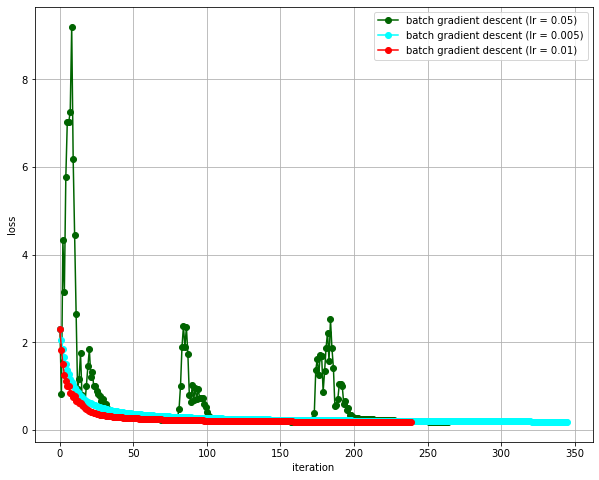

In [12]:
#%%
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    
    print ('---------------------------------------')
    print ("learning rate = {} ".format(learning_rate[i]))
    
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    
   
    print ("Training precision is:{}".format(Train[i]))

    
    print ("Testing precision is:{}".format(Test[i]))
    
    
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [13]:
def get_mini_batches(X, y, batch_size):
    random_idxs = np.random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs,:]
    y_shuffled = y[random_idxs]
    mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for
                   i in range(0, len(y), batch_size)]
    return mini_batches


In [14]:
def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
    
    #TODO: initialization
    notstop = True
    epoch = 0
    loss = []  

    X = np.insert(X, 0, 1, axis=1)
    c = np.unique(y)
    cl = {i:v for v,i in enumerate(c)}
    y = np.eye(len(c))[np.vectorize(lambda c: cl[c])(y).reshape(-1)]
    
    W = np.zeros(shape=(len(c), X.shape[1]))
    l = 0.1/2

    # optimization loop	
    while notstop and epoch < max_epoch:
        
        #TODO: SGD of each epoch
        mini_batches = get_mini_batches(X, y, batch_size)
        loss_epoch = 0.0
        for mb in mini_batches:
            X_i = mb[0]
            y_i = mb[1]

            if y_i.shape[0] < batch_size:
                continue

            soft_max = softmax(X_i, W, c)
            e = y_i - soft_max
            u = ((lr/y_i.shape[0]) * np.dot(e.T, X_i)) - (lr * 0.1 * W)
            W += u

            penalty = calculate_penalty(W)
            loss_epoch += calculate_loss_function(soft_max, y_i, l, penalty)
        loss.append(loss_epoch)
        
        print(f'epoch: {epoch}')
        print(f'loss: {loss_epoch}')
        
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print(f'reduce learning rate to {lr}')
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                notstop = False
                break
            
        epoch += 1
        
        #TODO: W and b
    b = W[:, 0]
    W = W[:, 1:]
    return (W, b, loss)

In [15]:
def Calculate_Precision_1(X, y):
    X = np.insert(X, 0, 1, axis=1)
    cs = np.unique(y_train)
    W1, b1, loss1 = LogisticRegression_SGD(X_train, y_train, 10, lr=0.01, eta=2.0e-1, eps = 1.0e-4, max_epoch=500)
    W = np.hstack((b1.reshape(-1, 1), W1))
    Z = np.dot(X, W.T).reshape(-1,len(cs))
    var1 = np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1)))/ np.sum(np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1))), axis=1).reshape(-1,1)
    var2 = np.vectorize(lambda c: cs[c])(np.argmax(var1, axis=1))
    return np.mean(var2 == y)
def Calculate_Precision_2(X, y):
    X = np.insert(X, 0, 1, axis=1)
    cs = np.unique(y_train)
    W2, b2, loss2 = LogisticRegression_SGD(X_train, y_train, 50, lr=0.01, eta=2.0e-1, eps = 1.0e-4, max_epoch=500)
    W = np.hstack((b2.reshape(-1, 1), W2))
    Z = np.dot(X, W.T).reshape(-1,len(cs))
    var1 = np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1)))/ np.sum(np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1))), axis=1).reshape(-1,1)
    var2 = np.vectorize(lambda c: cs[c])(np.argmax(var1, axis=1))
    return np.mean(var2 == y)
def Calculate_Precision_3(X, y):
    X = np.insert(X, 0, 1, axis=1)
    cs = np.unique(y_train)
    W3, b3, loss3 = LogisticRegression_SGD(X_train, y_train, 100, lr=0.01, eta=2.0e-1, eps = 1.0e-4, max_epoch=500)
    W = np.hstack((b3.reshape(-1, 1), W3))
    Z = np.dot(X, W.T).reshape(-1,len(cs))
    var1 = np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1)))/ np.sum(np.exp(Z-(np.amax(Z, axis=1).reshape(-1, 1))), axis=1).reshape(-1,1)
    var2 = np.vectorize(lambda c: cs[c])(np.argmax(var1, axis=1))
    return np.mean(var2 == y)

In [16]:
b11 = Calculate_Precision_1(X_train, y_train)
b12 = Calculate_Precision_1(X_test, y_test)
b22 = Calculate_Precision_2(X_train, y_train)
b23 = Calculate_Precision_2(X_test, y_test)
b33 = Calculate_Precision_3(X_train, y_train)
b34 = Calculate_Precision_3(X_test, y_test)
print ("For batch = 10 and lr = 0.01, Train_Set_Accuracy is {} and Test set Accuracy is {}".format(b11, b12))
print ("For batch = 50 and lr = 0.01, Train_Set_Accuracy is {} and Test set Accuracy is {}".format(b22,b23))
print ("For batch = 100 and lr = 0.01, Train_Set_Accuracy is {} and Test set Accuracy is {}".format (b33, b34))


epoch: 0
loss: 140.77950417739416
epoch: 1
loss: 43.44113876625559
epoch: 2
loss: 37.80999584072309
epoch: 3
loss: 36.218286113123966
epoch: 4
loss: 34.17519318612284
epoch: 5
loss: 33.8890336797174
epoch: 6
loss: 34.389038851860164
epoch: 7
loss: 37.087592206330456
epoch: 8
loss: 33.40176891441646
epoch: 9
loss: 35.978726237484004
epoch: 10
loss: 33.8655178896543
epoch: 11
loss: 33.29028982419941
epoch: 12
loss: 46.632548742963266
reduce learning rate to 0.005
epoch: 13
loss: 28.435123514872892
epoch: 14
loss: 27.578326511562068
epoch: 15
loss: 26.654734924328487
epoch: 16
loss: 25.79551986715848
epoch: 17
loss: 25.449201476293972
epoch: 18
loss: 25.535700898069052
epoch: 19
loss: 25.65981734494293
epoch: 20
loss: 25.744764779900144
epoch: 21
loss: 25.844109134479076
epoch: 22
loss: 25.108671299337487
epoch: 23
loss: 25.198491026776804
epoch: 24
loss: 25.265054603979532
epoch: 25
loss: 25.263840318667487
epoch: 26
loss: 25.684294307800656
epoch: 27
loss: 25.771921285841245
reduce lear

epoch: 50
loss: 4.398267886215522
epoch: 51
loss: 4.448705301618185
reduce learning rate to 0.0025
epoch: 52
loss: 4.349833708005261
epoch: 53
loss: 4.35916630908156
reduce learning rate to 0.00125
epoch: 54
loss: 4.34901726791161
epoch: 55
loss: 4.311708738867945
epoch: 56
loss: 4.259590914312162
epoch: 57
loss: 4.338694887484939
epoch: 58
loss: 4.337220678314084
epoch: 59
loss: 4.36063909227588
epoch: 60
loss: 4.322750833046433
epoch: 61
loss: 4.304932593446842
epoch: 62
loss: 4.334815167827687
epoch: 63
loss: 4.29568594716276
epoch: 64
loss: 4.350459973440112
reduce learning rate to 0.000625
epoch: 65
loss: 4.32403720153406
reduce learning rate to 0.0003125
epoch: 66
loss: 4.332776417622001
reduce learning rate to 0.00015625
epoch: 67
loss: 4.26632294615393
epoch: 68
loss: 4.327710553625717
epoch: 69
loss: 4.3258393888707145
epoch: 70
loss: 4.2722270501003585
epoch: 71
loss: 4.309548469363513
reduce learning rate to 7.8125e-05
epoch: 72
loss: 4.307748759156863
epoch: 73
loss: 4.2957

In [17]:
Train1 = [b11, b22, b33]
Test1 = [b12, b23, b34]

---------------------------------------
batch_size = 10
epoch: 0
loss: 141.3283964608935
epoch: 1
loss: 43.02274036138629
epoch: 2
loss: 41.77035102586443
epoch: 3
loss: 38.604963253167945
epoch: 4
loss: 38.2369710195892
epoch: 5
loss: 34.78137091964345
epoch: 6
loss: 33.117707379096316
epoch: 7
loss: 36.52447493394165
epoch: 8
loss: 39.14304671838704
epoch: 9
loss: 36.198283413611264
epoch: 10
loss: 33.702585082747454
epoch: 11
loss: 32.96327103128664
epoch: 12
loss: 34.13127252436887
epoch: 13
loss: 36.340824191111146
epoch: 14
loss: 32.76522168863038
epoch: 15
loss: 35.50075562135063
reduce learning rate to 0.005
epoch: 16
loss: 26.793916445487437
epoch: 17
loss: 27.163117648869758
epoch: 18
loss: 26.113739142902105
epoch: 19
loss: 25.206015687636803
epoch: 20
loss: 25.273187236039483
epoch: 21
loss: 25.255082232463234
epoch: 22
loss: 25.92110590086813
epoch: 23
loss: 25.650419932547205
epoch: 24
loss: 25.85164004986904
epoch: 25
loss: 25.39281654665657
epoch: 26
loss: 25.3166044905

epoch: 48
loss: 2.211650684453978
epoch: 49
loss: 2.212394208065095
epoch: 50
loss: 2.194254457677012
epoch: 51
loss: 2.184944207705097
epoch: 52
loss: 2.2182983319143763
epoch: 53
loss: 2.172706129177075
epoch: 54
loss: 2.2064095582509826
epoch: 55
loss: 2.2040493610950773
epoch: 56
loss: 2.1670813177263577
epoch: 57
loss: 2.219209393153352
reduce learning rate to 0.00125
epoch: 58
loss: 2.2058128654928897
epoch: 59
loss: 2.186861651688699
epoch: 60
loss: 2.158372009572392
epoch: 61
loss: 2.1770801243659212
epoch: 62
loss: 2.187691391426739
epoch: 63
loss: 2.1980343728839777
reduce learning rate to 0.000625
epoch: 64
loss: 2.1729027657068474
epoch: 65
loss: 2.1907969512061327
epoch: 66
loss: 2.1883338925130613
reduce learning rate to 0.0003125
epoch: 67
loss: 2.1571444426773296
epoch: 68
loss: 2.197046437837007
epoch: 69
loss: 2.1525175600269533
epoch: 70
loss: 2.1969706821655515
reduce learning rate to 0.00015625
Training precision is:0.985894580549369
Testing precision is:0.97333333

Text(0, 0.5, 'loss')

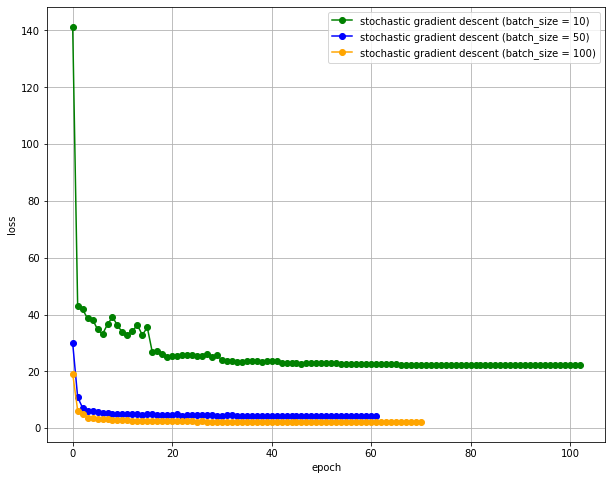

In [18]:
#%%
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
lr = [0.01, 0.01, 0.01]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    print ('---------------------------------------')
    print ('batch_size = {}'.format(bs[i]))
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    
      
    #TODO
    print ("Training precision is:{}".format(Train1[i]))

    #TODO
    print ("Testing precision is:{}".format(Test1[i]))
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

In [19]:
W1, b1, loss1 = LogisticRegression_SGD(X_train, y_train, 10, lr=0.01, eta=2.0e-1, eps = 1.0e-4, max_epoch=500)
W2, b2, loss2 = LogisticRegression_SGD(X_train, y_train, 50, lr=0.01, eta=2.0e-1, eps = 1.0e-4, max_epoch=500)
W3, b3, loss3 = LogisticRegression_SGD(X_train, y_train, 100, lr=0.01, eta=2.0e-1, eps = 1.0e-4, max_epoch=500)
W11, b11, loss11 = LogisticRegression_GD(X_train, y_train, 5.0e-3)
W22, b22, loss22= LogisticRegression_GD(X_train, y_train, 1.0e-2)
W33, b33, loss33 = LogisticRegression_GD(X_train, y_train, 5.0e-2)

epoch: 0
loss: 142.82649395352303
epoch: 1
loss: 41.36361216763538
epoch: 2
loss: 37.56438634781385
epoch: 3
loss: 35.39545012181476
epoch: 4
loss: 35.236786450452705
epoch: 5
loss: 40.0233072044312
epoch: 6
loss: 37.593829886886695
epoch: 7
loss: 36.19994318731247
epoch: 8
loss: 36.66843687048324
epoch: 9
loss: 33.802523327469366
epoch: 10
loss: 33.97691772980491
epoch: 11
loss: 33.71195768447144
epoch: 12
loss: 33.714032510315434
epoch: 13
loss: 30.856190766880047
epoch: 14
loss: 32.69797011859714
epoch: 15
loss: 40.30668580961702
reduce learning rate to 0.005
epoch: 16
loss: 28.14377442934735
epoch: 17
loss: 26.40167855372148
epoch: 18
loss: 25.895966938328506
epoch: 19
loss: 25.50661054942622
epoch: 20
loss: 25.291204130325927
epoch: 21
loss: 25.998090013244358
epoch: 22
loss: 25.21793405396373
epoch: 23
loss: 25.55660089317428
epoch: 24
loss: 25.852525321096635
epoch: 25
loss: 25.34173183306287
epoch: 26
loss: 25.704791147718648
epoch: 27
loss: 25.072744029466005
epoch: 28
loss: 2

epoch: 49
loss: 2.2680861264126917
epoch: 50
loss: 2.262777549270978
reduce learning rate to 0.005
epoch: 51
loss: 2.2020448986578116
epoch: 52
loss: 2.221987818809287
epoch: 53
loss: 2.1793747195086897
epoch: 54
loss: 2.2045320543173768
epoch: 55
loss: 2.165113593023439
epoch: 56
loss: 2.16086312781245
epoch: 57
loss: 2.21355447554931
epoch: 58
loss: 2.202852685437689
epoch: 59
loss: 2.1912436934083668
epoch: 60
loss: 2.1630055810939903
epoch: 61
loss: 2.187841710915298
epoch: 62
loss: 2.2093891890226445
epoch: 63
loss: 2.1606704384111013
epoch: 64
loss: 2.185194996707251
epoch: 65
loss: 2.1931148812386825
reduce learning rate to 0.0025
epoch: 66
loss: 2.177987084819255
reduce learning rate to 0.00125
epoch: 67
loss: 2.1883456569216566
epoch: 68
loss: 2.1722037732819226
epoch: 69
loss: 2.131736422954254
epoch: 70
loss: 2.167246715876958
reduce learning rate to 0.000625
epoch: 71
loss: 2.1584169890246194
epoch: 72
loss: 2.159873802740629
epoch: 73
loss: 2.161536904425047
reduce learnin

iteration: 148
new F: 0.23499718838750375
prev F: 0.23499718838750375
difference: 0.000522504642720717
iteration: 149
new F: 0.23448127788326353
prev F: 0.23448127788326353
difference: 0.0005159105042402135
iteration: 150
new F: 0.2339718381723226
prev F: 0.2339718381723226
difference: 0.0005094397109409454
iteration: 151
new F: 0.23346874898911135
prev F: 0.23346874898911135
difference: 0.0005030891832112361
iteration: 152
new F: 0.23297189305144458
prev F: 0.23297189305144458
difference: 0.0004968559376667681
iteration: 153
new F: 0.23248115596790606
prev F: 0.23248115596790606
difference: 0.0004907370835385283
iteration: 154
new F: 0.23199642614868612
prev F: 0.23199642614868612
difference: 0.0004847298192199312
iteration: 155
new F: 0.23151759471972186
prev F: 0.23151759471972186
difference: 0.0004788314289642659
iteration: 156
new F: 0.23104455543999708
prev F: 0.23104455543999708
difference: 0.00047303927972477955
iteration: 157
new F: 0.2305772046218656
prev F: 0.230577204621865

iteration: 253
new F: 0.20236510901202273
prev F: 0.20236510901202273
difference: 0.00018591075183346795
iteration: 254
new F: 0.20218064119165408
prev F: 0.20218064119165408
difference: 0.0001844678203686556
iteration: 255
new F: 0.20199760007549186
prev F: 0.20199760007549186
difference: 0.00018304111616221364
iteration: 256
new F: 0.20181596967856116
prev F: 0.20181596967856116
difference: 0.0001816303969306987
iteration: 257
new F: 0.20163573425365244
prev F: 0.20163573425365244
difference: 0.00018023542490872013
iteration: 258
new F: 0.20145687828690326
prev F: 0.20145687828690326
difference: 0.00017885596674918625
iteration: 259
new F: 0.2012793864934801
prev F: 0.2012793864934801
difference: 0.00017749179342316235
iteration: 260
new F: 0.2011032438133546
prev F: 0.2011032438133546
difference: 0.00017614268012550172
iteration: 261
new F: 0.2009284354071743
prev F: 0.2009284354071743
difference: 0.00017480840618028237
iteration: 262
new F: 0.20075494665222401
prev F: 0.20075494665

iteration: 14
new F: 0.6127473853322327
prev F: 0.6127473853322327
difference: 0.0038171777146598362
iteration: 15
new F: 0.5600541813029013
prev F: 0.5600541813029013
difference: 0.05269320402933142
iteration: 16
new F: 0.5379149762495793
prev F: 0.5379149762495793
difference: 0.02213920505332201
iteration: 17
new F: 0.49890535279944603
prev F: 0.49890535279944603
difference: 0.03900962345013326
iteration: 18
new F: 0.48283966475391854
prev F: 0.48283966475391854
difference: 0.016065688045527493
iteration: 19
new F: 0.44970046958337573
prev F: 0.44970046958337573
difference: 0.03313919517054281
iteration: 20
new F: 0.43864929832870914
prev F: 0.43864929832870914
difference: 0.011051171254666592
iteration: 21
new F: 0.4138818797996164
prev F: 0.4138818797996164
difference: 0.024767418529092755
iteration: 22
new F: 0.4051609829236205
prev F: 0.4051609829236205
difference: 0.008720896875995865
iteration: 23
new F: 0.3874099581879704
prev F: 0.3874099581879704
difference: 0.01775102473565

iteration: 161
new F: 0.19200017417257814
prev F: 0.19200017417257814
difference: 0.00022562537517431536
iteration: 162
new F: 0.19177734154619458
prev F: 0.19177734154619458
difference: 0.00022283262638356227
iteration: 163
new F: 0.19155725248840688
prev F: 0.19155725248840688
difference: 0.00022008905778769794
iteration: 164
new F: 0.19133985896221947
prev F: 0.19133985896221947
difference: 0.00021739352618740937
iteration: 165
new F: 0.19112511404079166
prev F: 0.19112511404079166
difference: 0.00021474492142781187
iteration: 166
new F: 0.19091297187553646
prev F: 0.19091297187553646
difference: 0.0002121421652551969
iteration: 167
new F: 0.19070338766531425
prev F: 0.19070338766531425
difference: 0.0002095842102222134
iteration: 168
new F: 0.1904963176266786
prev F: 0.1904963176266786
difference: 0.00020707003863565387
iteration: 169
new F: 0.19029171896513197
prev F: 0.19029171896513197
difference: 0.00020459866154662332
iteration: 170
new F: 0.19008954984735205
prev F: 0.1900895

iteration: 13
new F: 1.157411077635587
prev F: 1.157411077635587
difference: 0.23468441889578884
iteration: 14
new F: 1.750036614290916
prev F: 1.750036614290916
difference: 0.592625536655329
iteration: 15
new F: 0.790539881691917
prev F: 0.790539881691917
difference: 0.959496732598999
iteration: 16
new F: 0.610736208341459
prev F: 0.610736208341459
difference: 0.179803673350458
iteration: 17
new F: 0.6057276408697796
prev F: 0.6057276408697796
difference: 0.005008567471679437
iteration: 18
new F: 1.0110018337261448
prev F: 1.0110018337261448
difference: 0.40527419285636523
iteration: 19
new F: 1.4477369909370652
prev F: 1.4477369909370652
difference: 0.4367351572109204
iteration: 20
new F: 1.8418809510977392
prev F: 1.8418809510977392
difference: 0.394143960160674
iteration: 21
new F: 1.2074879403092735
prev F: 1.2074879403092735
difference: 0.6343930107884657
iteration: 22
new F: 1.3254584442889938
prev F: 1.3254584442889938
difference: 0.11797050397972031
iteration: 23
new F: 0.9962

iteration: 114
new F: 0.2483158040687169
prev F: 0.2483158040687169
difference: 0.002191632959881673
iteration: 115
new F: 0.24619334523509093
prev F: 0.24619334523509093
difference: 0.0021224588336259675
iteration: 116
new F: 0.2441356380034972
prev F: 0.2441356380034972
difference: 0.002057707231593736
iteration: 117
new F: 0.2421387702936243
prev F: 0.2421387702936243
difference: 0.001996867709872896
iteration: 118
new F: 0.24019925968652067
prev F: 0.24019925968652067
difference: 0.0019395106071036228
iteration: 119
new F: 0.23831398335801335
prev F: 0.23831398335801335
difference: 0.0018852763285073237
iteration: 120
new F: 0.236480131446682
prev F: 0.236480131446682
difference: 0.0018338519113313412
iteration: 121
new F: 0.23469516628598164
prev F: 0.23469516628598164
difference: 0.0017849651607003691
iteration: 122
new F: 0.23295678985309068
prev F: 0.23295678985309068
difference: 0.001738376432890959
iteration: 123
new F: 0.23126291567441998
prev F: 0.23126291567441998
differen

iteration: 215
new F: 0.23507945822110665
prev F: 0.23507945822110665
difference: 0.0018228532646994977
iteration: 216
new F: 0.2333079572203054
prev F: 0.2333079572203054
difference: 0.0017715010008012566
iteration: 217
new F: 0.2315850623513827
prev F: 0.2315850623513827
difference: 0.0017228948689226864
iteration: 218
new F: 0.22990831244406348
prev F: 0.22990831244406348
difference: 0.001676749907319225
iteration: 219
new F: 0.22827549719532558
prev F: 0.22827549719532558
difference: 0.001632815248737901
iteration: 220
new F: 0.22668462243503962
prev F: 0.22668462243503962
difference: 0.0015908747602859652
iteration: 221
new F: 0.22513388480253088
prev F: 0.22513388480253088
difference: 0.0015507376325087363
iteration: 222
new F: 0.22362164699924042
prev F: 0.22362164699924042
difference: 0.0015122378032904615
iteration: 223
new F: 0.2221464184906056
prev F: 0.2221464184906056
difference: 0.0014752285086348238
iteration: 224
new F: 0.22070683738012153
prev F: 0.22070683738012153
di